Exposure on portfolio: 

In [25]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re

In [3]:
root_path = ''
weights = pd.read_csv(root_path + '/Users/manassamantaray/Downloads/Portfolio Weights.csv', index_col=0)
sector_info = pd.DataFrame()
industry_info = pd.DataFrame()

In [51]:
symbols = ['AAPL', 'MMM', 'INTC', 'JPM', 'DE', 'WFC', 'BK', 'PM', 'HD', 'GE', 'GOOG', 'MSFT']
for i in range(len(symbols)): 
    url = 'https://eresearch.fidelity.com/eresearch/goto/evaluate/snapshot.jhtml?symbols=' + symbols[i]
    # print(url)
    # html_info = requests.get(url).text
    
    #Web Page
    html = requests.get(url).text
    
    # get sector information
    sector_input = html.split('<a href="http://eresearch.fidelity.com/eresearch/markets_sectors/sectors/sectors_in_market.jhtml?tab=learn&sector=')[1].split('</a>')[0]
    sector = " ".join(re.findall("[a-zA-Z]+", sector_input))

    #get industry information
    industry_input = html.split('<a href="http://eresearch.fidelity.com/eresearch/markets_sectors/sectors/industries.jhtml?tab=learn&industry=')[1].split('</a>')[0]
    industry = " ".join(re.findall("[a-zA-Z]+", industry_input))
    
    sector_info = sector_info.append({'Sector': sector, 'Symbol': symbols[i]}, ignore_index=True)   
    industry_info = industry_info.append({'Industry': industry, 'Symbol': symbols[i]}, ignore_index=True)

# take out NaN
sector_info = sector_info[~sector_info['Symbol'].isnull()]
sector_info.set_index('Symbol', inplace=True)
print(sector_info)
industry_info = industry_info[~industry_info['Symbol'].isnull()]
industry_info.set_index('Symbol', inplace=True)
print(industry_info)


                        Sector
Symbol                        
AAPL    Information Technology
MMM                Industrials
INTC    Information Technology
JPM                 Financials
DE                 Industrials
WFC                 Financials
BK                  Financials
PM            Consumer Staples
HD      Consumer Discretionary
GE                 Industrials
GOOG    Communication Services
MSFT    Information Technology
                                       Industry
Symbol                                         
AAPL    Technology Hardware Storage Peripherals
MMM                    Industrial Conglomerates
INTC     Semiconductors Semiconductor Equipment
JPM                                       Banks
DE                                    Machinery
WFC                                       Banks
BK                              Capital Markets
PM                                      Tobacco
HD                             Specialty Retail
GE                     Industrial Cong

In [48]:
# prepation for sectorial weight
sectorial_weight_df = pd.concat([sector_info, weights], axis=1)
sectorial_weight_df.columns = ["Sector", "Weight"]
# sectorial_weight_df

# Weight per sectors
weight_per_sector = sectorial_weight_df.groupby(["Sector"]).sum()
weight_per_sector.to_csv(root_path+'/Users/manassamantaray/Downloads/Sectoral Weights.csv', index=True)



,Weight
Sector,
Communication Services,0.470574
Consumer Discretionary,0.081783
Consumer Staples,0.045288
Financials,0.098315
Industrials,0.159384
Information Technology,0.144670


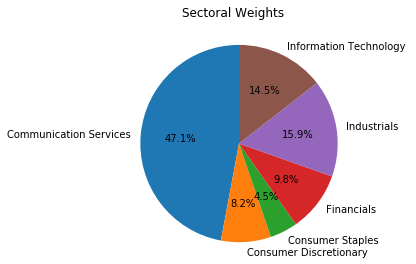

In [50]:
import matplotlib.pyplot as plt

plt.pie(
        weight_per_sector["Weight"],
        labels=weight_per_sector.index,
        shadow=False,
        startangle=90,
        autopct='%1.1f%%',
    )

plt.axis('equal')
plt.suptitle('Sectoral Weights')
plt.show()

In [57]:
asset_exposure = pd.concat([sector_info, industry_info], axis=1)
asset_exposure.to_csv(root_path+'/Users/manassamantaray/Downloads/Asset Exposure.csv', index=True)
asset_exposure

,Sector,Industry
Symbol,,
AAPL,Information Technology,Technology Hardware Storage Peripherals
MMM,Industrials,Industrial Conglomerates
INTC,Information Technology,Semiconductors Semiconductor Equipment
JPM,Financials,Banks
DE,Industrials,Machinery
WFC,Financials,Banks
BK,Financials,Capital Markets
PM,Consumer Staples,Tobacco
HD,Consumer Discretionary,Specialty Retail
